#  Human mobility and COVID-19 epidemic

Student: Nguyen Xuan Tung

ID: 2005491


## Library

In [1]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import pandas as pd 
import seaborn as sns
import random 
import fileinput
import math
import operator
import scipy
import csv
import itertools
from covid19dh import covid19
import statistics

#from skmisc.loess import loess

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors

from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from datetime import datetime
from datetime import timedelta

from scipy.stats import poisson
from scipy import stats as sps
from scipy.interpolate import interp1d
from scipy import stats

from IPython.display import clear_output

pd.options.mode.chained_assignment = None  # default='warn'


### Mobility data

In [2]:
df_mobility_italy = pd.read_csv("2021_IT_Region_Mobility_Report.csv",index_col="sub_region_1")
df_mobility_italy

,country_region_code,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,,,,,,
NaN,IT,Italy,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-01,-88,-90,-66.0,-83.0,-85,31
NaN,IT,Italy,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-02,-69,-36,-66.0,-68.0,-49,21
NaN,IT,Italy,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-03,-72,-42,-59.0,-62.0,-28,16
NaN,IT,Italy,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-04,-23,15,-16.0,-45.0,-43,15
NaN,IT,Italy,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-05,-47,5,-45.0,-58.0,-49,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-26,-47,-58,11.0,-26.0,-23,9
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-27,-4,33,49.0,-40.0,-43,12
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-28,-4,26,59.0,-40.0,-43,12


In [3]:
df_mobility_italy.drop(["Abruzzo","Apulia","Basilicata","Calabria","Campania","Emilia-Romagna","Friuli-Venezia Giulia","Lazio","Liguria","Lombardy","Marche","Piedmont","Sardinia","Sicily","Trentino-South Tyrol","Tuscany","Umbria"], inplace = True)
df_mobility_italy.tail()

,country_region_code,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,,,,,,,,,
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-26,-47,-58,11.0,-26.0,-23,9
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-27,-4,33,49.0,-40.0,-43,12
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-28,-4,26,59.0,-40.0,-43,12
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-29,-4,34,68.0,-38.0,-43,12
Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-30,-3,56,65.0,-33.0,-47,13


In [4]:
df_mobility_italy = df_mobility_italy.reset_index()
df_mobility_italy.tail()

,sub_region_1,country_region_code,country_region,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
4727,Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-26,-47,-58,11.0,-26.0,-23,9
4728,Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-27,-4,33,49.0,-40.0,-43,12
4729,Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-28,-4,26,59.0,-40.0,-43,12
4730,Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-29,-4,34,68.0,-38.0,-43,12
4731,Veneto,IT,Italy,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-30,-3,56,65.0,-33.0,-47,13


In [5]:
region_name_mobi =df_mobility_italy["sub_region_1"].dropna().unique()
region_name_mobi

array(['Aosta', 'Molise', 'Veneto'], dtype=object)

In [6]:
rmv_region_data = (np.array(df_mobility_italy['sub_region_2'].isnull()))
df_mobility_italy = df_mobility_italy[rmv_region_data]

In [7]:
# drop the columns that we do not require for mobility analysis.
df_mobility_italy = df_mobility_italy.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
#df_mobility_italy

In [8]:
#drop the whole row itself if there exists NaN anywhere in dataframe.
df_mobility_italy = df_mobility_italy.dropna()
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
364,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-01,-90,-85,-56.0,-80.0,-84,33
365,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-02,-83,-48,-68.0,-76.0,-52,23
366,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-03,-83,-49,-66.0,-74.0,-46,18
367,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-04,-49,5,-26.0,-52.0,-46,17
368,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-05,-61,-3,-29.0,-59.0,-49,20
...,...,...,...,...,...,...,...,...,...
2179,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-46,-54,-2.0,-33.0,-21,8
2180,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-5,25,27.0,-35.0,-42,11
2181,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-4,23,40.0,-34.0,-41,12
2182,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-7,28,35.0,-33.0,-42,12


In [9]:
df_mobility_italy.drop( df_mobility_italy[ df_mobility_italy['sub_region_1'] =='Trentino-South Tyrol' ].index , inplace=True)

In [10]:
df_mobility_italy['retail_and_recreation_percent_change_from_baseline'] = df_mobility_italy['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['parks_percent_change_from_baseline'] = df_mobility_italy['parks_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['transit_stations_percent_change_from_baseline'] = df_mobility_italy['transit_stations_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['workplaces_percent_change_from_baseline'] = df_mobility_italy['workplaces_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['residential_percent_change_from_baseline'] = df_mobility_italy['residential_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'] = df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

In [11]:
Average = (df_mobility_italy["retail_and_recreation_percent_change_from_baseline"] 
         + df_mobility_italy["parks_percent_change_from_baseline"] 
         + df_mobility_italy["transit_stations_percent_change_from_baseline"] 
         + df_mobility_italy["workplaces_percent_change_from_baseline"] 
        + df_mobility_italy["residential_percent_change_from_baseline"] 
        + df_mobility_italy["grocery_and_pharmacy_percent_change_from_baseline"] )/3

In [12]:
df_mobility_italy.insert(3,"Average",Average)   

In [13]:
df_mobility_italy["Average"] = df_mobility_italy["Average"]

In [14]:
df_mobility_italy

,sub_region_1,place_id,date,Average,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
364,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,Aosta,ChIJp_WvxdbeiEcRm9WceXyYJVY,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2179,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-17.809524,-13.857143,10.857143,1.285714,-31.000000,-27.285714,6.571429
2180,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-19.000000,-14.714286,10.714286,4.000000,-32.714286,-32.000000,7.714286
2181,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-20.238095,-16.142857,9.428571,7.714286,-34.285714,-36.428571,9.000000
2182,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-22.190476,-18.000000,7.857143,10.571429,-36.428571,-41.000000,10.428571


### $R_t$ data

In [15]:
data = 'rt_value_full.csv'
data_table = pd.read_csv(data,sep=',')
df = pd.DataFrame(data_table)
df

,region,date,strat,type,median,mean,sd,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90
0,Molise,2020-03-03,NaN,estimate,1.224777,1.228100,0.157694,0.976029,1.124239,1.184020,1.262137,1.328348,1.499564
1,Molise,2020-03-04,NaN,estimate,1.239932,1.242405,0.147161,1.005466,1.144261,1.202289,1.273238,1.335740,1.492706
2,Molise,2020-03-05,NaN,estimate,1.254316,1.258031,0.137829,1.042267,1.164666,1.220513,1.288402,1.344616,1.491369
3,Molise,2020-03-06,NaN,estimate,1.270182,1.274498,0.130081,1.070320,1.184491,1.238180,1.302643,1.356736,1.494971
4,Molise,2020-03-07,NaN,estimate,1.285966,1.291182,0.124287,1.098474,1.205590,1.256081,1.316970,1.370471,1.501277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,Veneto,2021-12-16,NaN,forecast,1.119328,1.124909,0.150108,0.885672,1.018863,1.081134,1.157336,1.220938,1.386175
1976,Veneto,2021-12-17,NaN,forecast,1.119328,1.124909,0.150108,0.885672,1.018863,1.081134,1.157336,1.220938,1.386175
1977,Veneto,2021-12-18,NaN,forecast,1.119328,1.124909,0.150108,0.885672,1.018863,1.081134,1.157336,1.220938,1.386175
1978,Veneto,2021-12-19,NaN,forecast,1.119328,1.124909,0.150108,0.885672,1.018863,1.081134,1.157336,1.220938,1.386175


In [16]:
#df = df.dropna()
regions= list(df.region.unique())

In [17]:
region_name_mobi

array(['Aosta', 'Molise', 'Veneto'], dtype=object)

In [18]:
regions

['Molise', "Valle d'Aosta", 'Veneto']

In [19]:
regions[-1]

'Veneto'

In [20]:
replace_dict = {"Molise":"Molise","Veneto":"Veneto","Aosta":"Valle d'Aosta"}

In [21]:
for i in range(len(replace_dict.keys())):
    df_mobility_italy["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [22]:
df_mobility_italy.tail()

,sub_region_1,place_id,date,Average,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2179,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-17.809524,-13.857143,10.857143,1.285714,-31.000000,-27.285714,6.571429
2180,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-19.000000,-14.714286,10.714286,4.000000,-32.714286,-32.000000,7.714286
2181,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-20.238095,-16.142857,9.428571,7.714286,-34.285714,-36.428571,9.000000
2182,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-22.190476,-18.000000,7.857143,10.571429,-36.428571,-41.000000,10.428571
2183,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-30,-23.666667,-20.285714,6.571429,14.428571,-38.142857,-45.428571,11.857143


### Plot

In [23]:
#df = df.dropna()
regions= list(df.region.unique())

In [24]:
regions

['Molise', "Valle d'Aosta", 'Veneto']

In [25]:
regions[-1]

'Veneto'

In [26]:
df_r=df[df['region'] == regions[-1]]
df_r=df_r[df_r['date'].between("2021-01-01","2021-12-20")]

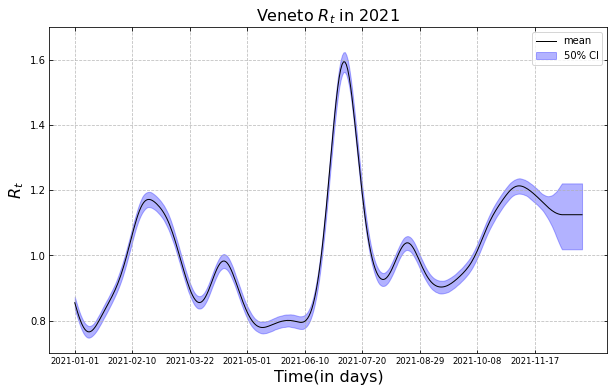

In [27]:
def get_mobdates(Rt_startdate, Rt_enddate):
    dt_format_Rtstart = datetime.strptime(Rt_startdate, '%Y-%m-%d')
    dt_format_Rtend = datetime.strptime(Rt_enddate, '%Y-%m-%d')

    dt_format_regstart = dt_format_Rtstart - timedelta(days=15)
    dt_format_regend = dt_format_Rtend - timedelta(days=15)


    reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") # get it in string
    reg_enddate = dt_format_regend.strftime("%Y-%m-%d") # get it in string
    return reg_startdate, reg_enddate


#for i in regions[:-1]:
#df_r=df[df['denominazione_regione'] == 'Piemonte'] 
y=df_r['mean']
x=df_r['date']
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(x,y,linewidth=1,color='black',label='mean')
#plt.fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
plt.fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 

# aesthetics and shit
plt.ylabel('$R_{t}$',size=16)
plt.xlabel("Time(in days)",size=16)
plt.title('Veneto $R_{t}$ in 2021',size=16)
plt.xticks(x[::40],size=8.5)
plt.legend(loc='best')
plt.ylim([0.7,1.7])

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.8,which='both')

#regions

plt.show()

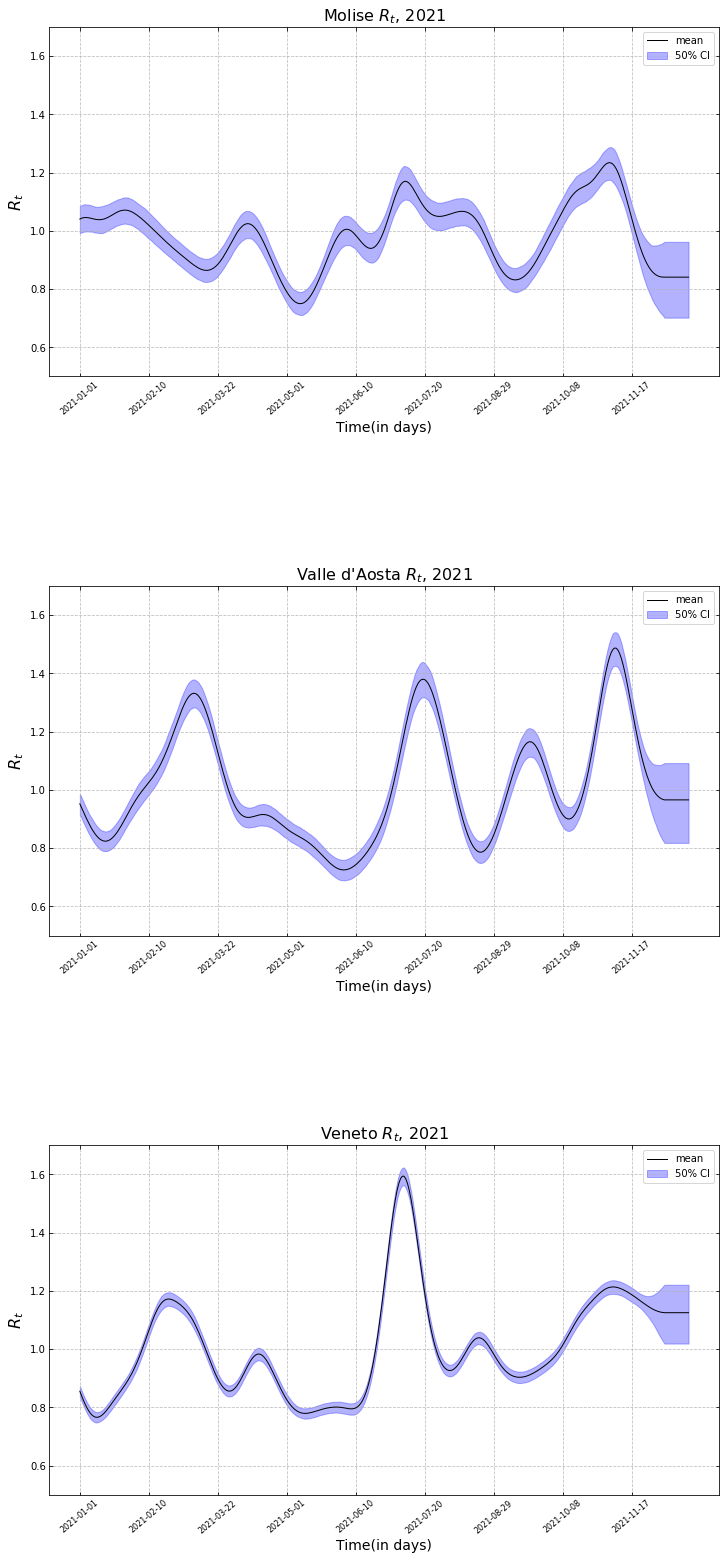

In [28]:
fig, axs = plt.subplots(3,1, figsize=(12, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
#new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]

for b,i in enumerate(regions):
    
    df_r=df[df['region'] == i]
    df_r=df_r[df_r['date'].between("2021-01-01","2021-12-20")]
    
    y=np.array(df_r['mean'])
    x=np.array(df_r['date'])
    #axs[b].figure(figsize=(10,6))
    axs[b].plot(x,y,linewidth=1,color='black',label='mean')
    #axs[b].fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
    axs[b].fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 
    
      # aesthetics and shit
    axs[b].set_ylabel('$R_{t}$',size=16)
    axs[b].set_xlabel("Time(in days)",size=14)
    axs[b].set_title('%s $R_{t}$, 2021'%i,size=16)
    axs[b].set_xticks(x[::40])
    axs[b].set_xticklabels(x[::40],fontsize=8,rotation=40)
    axs[b].legend(loc='best')
    axs[b].set_ylim([0.5,1.7])

    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.8,which='both')

In [29]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ["Valle d'Aosta",'Molise','Veneto']

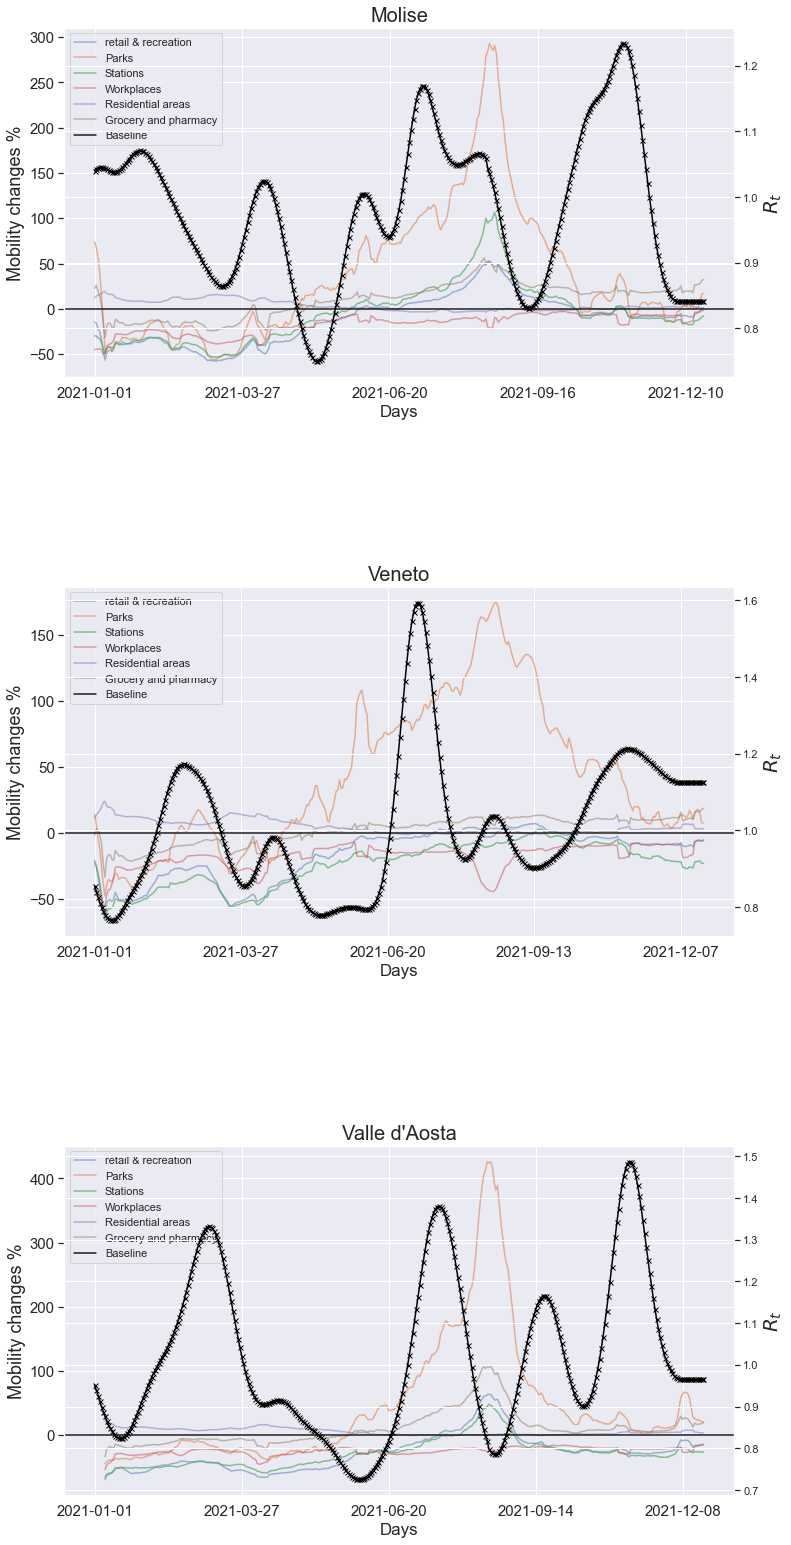

In [32]:
sns.set()
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Molise',
 'Veneto',
 "Valle d'Aosta"]):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        ax[b].plot(x,rt,label='$R_t$',color="black",linestyle="solid", marker="x",markersize=5)
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")

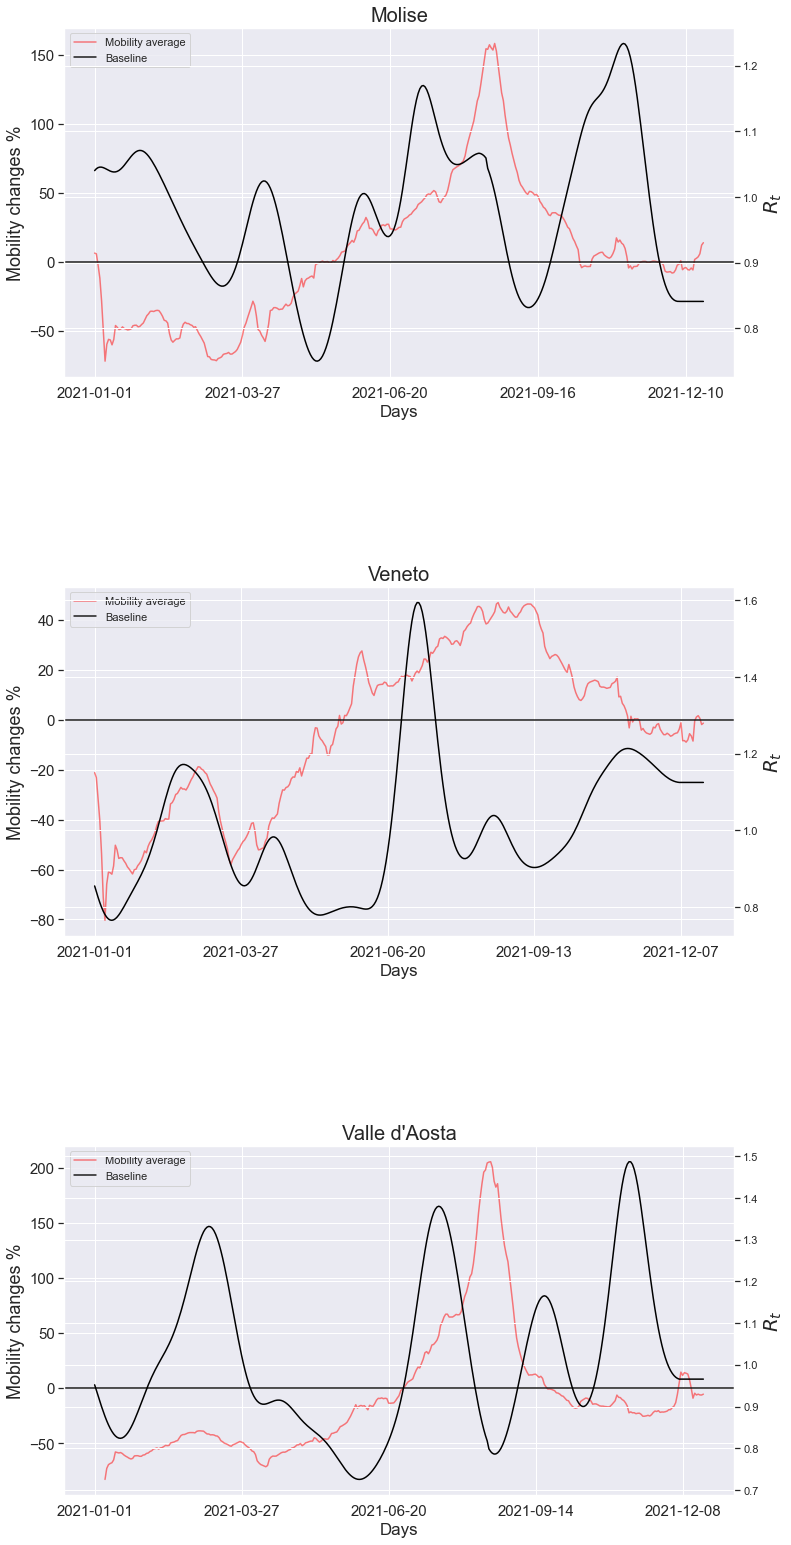

In [33]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate([
 'Molise',
 'Veneto',
 "Valle d'Aosta"]):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-20')]
        
        reg_rt = df[df['region']==i] 
        reg_rt = reg_rt[reg_rt['date'].between('2021-01-01','2021-12-20')]
 

        idx1 = pd.Index(reg_rt['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_rt = reg_rt[reg_rt.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y = reg_mob['Average']
        x = reg_mob['date'] 

        rt=reg_rt['mean']
        ax[b] = axs[b].twinx()
        axs[b].plot(x,y,label='Mobility average',color="red", alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        ax[b].plot(x,rt,label='$R_t$',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        ax[b].set_ylabel('$R_t$',size=20)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="upper left")

In [45]:
x = pd.read_csv("owid-covid-data.csv")
x

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151315,ZWE,Africa,Zimbabwe,2021-12-27,205449.0,1098.0,1481.429,4908.0,17.0,14.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151316,ZWE,Africa,Zimbabwe,2021-12-28,207548.0,2099.0,1397.143,4940.0,32.0,17.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151317,ZWE,Africa,Zimbabwe,2021-12-29,207548.0,0.0,1163.429,4940.0,0.0,16.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
151318,ZWE,Africa,Zimbabwe,2021-12-30,211728.0,4180.0,1483.429,4997.0,57.0,20.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [46]:
x = x.filter(["location","date","reproduction_rate"], axis=1)
x

,location,date,reproduction_rate
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
151315,Zimbabwe,2021-12-27,0.87
151316,Zimbabwe,2021-12-28,NaN
151317,Zimbabwe,2021-12-29,NaN
151318,Zimbabwe,2021-12-30,NaN


In [47]:
x = x[x.location=='Italy']
x

,location,date,reproduction_rate
68923,Italy,2020-01-31,NaN
68924,Italy,2020-02-01,NaN
68925,Italy,2020-02-02,NaN
68926,Italy,2020-02-03,NaN
68927,Italy,2020-02-04,NaN
...,...,...,...
69619,Italy,2021-12-27,1.39
69620,Italy,2021-12-28,NaN
69621,Italy,2021-12-29,NaN
69622,Italy,2021-12-30,NaN


(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]),
 [Text(-100.0, 0, '2021-09-23'),
  Text(0.0, 0, '2020-01-31'),
  Text(100.0, 0, '2020-05-10'),
  Text(200.0, 0, '2020-08-18'),
  Text(300.0, 0, '2020-11-26'),
  Text(400.0, 0, '2021-03-06'),
  Text(500.0, 0, '2021-06-14'),
  Text(600.0, 0, '2021-09-22'),
  Text(700.0, 0, '2021-12-31'),
  Text(800.0, 0, '')])

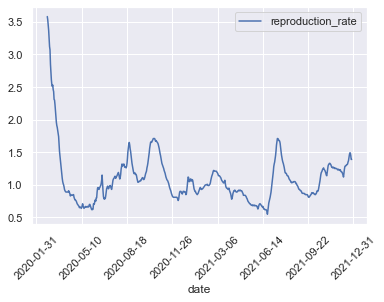

In [49]:
x.plot(x='date',y='reproduction_rate')
plt.xticks(rotation=45)